# STOR 120 - Homework 2: Table Manipulation and Visualization

Please complete this notebook by filling in the cells provided. 

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Visualizations

Tables are a powerful way of organizing and visualizing data. However, large tables of numbers can be difficult to interpret, no matter how organized they are. Sometimes it is much easier to interpret graphs than numbers. Next you will use some fundamental graphical methods of data analysis to view the data from tables in a different way.

### `plot`

Line plots, sometimes known as line graphs, are among the most common visualizations. They are often used to study chronological trends and patterns. `plot` is a table function that will construct a line plot for a `table` when we specify the column labels and the variables that we want on the horizontal axis, `column_label_x`, and the vertical axis, `column_label_y`.

`table.plot(column_label_x, column_label_y)`

Run the cell below to import the `NCpop2024` table. The data includes estimated North Carolina populations in every year from 1900 to roughly the present from the [FRED Economic Data](https://fred.stlouisfed.org/series/NCPOP).

In [2]:
NCpop2024 = Table.read_table("NCpop2024.csv")
NCpop2024

Year,NCPOP
1900,1897
1901,1926
1902,1956
1903,1986
1904,2017
1905,2051
1906,2077
1907,2105
1908,2142
1909,2174


**Question 1.1.** Use the `NCpop2024` table to construct a line plot with `Year` on the horizontal axis and `NCPOP` on the vertical axis.

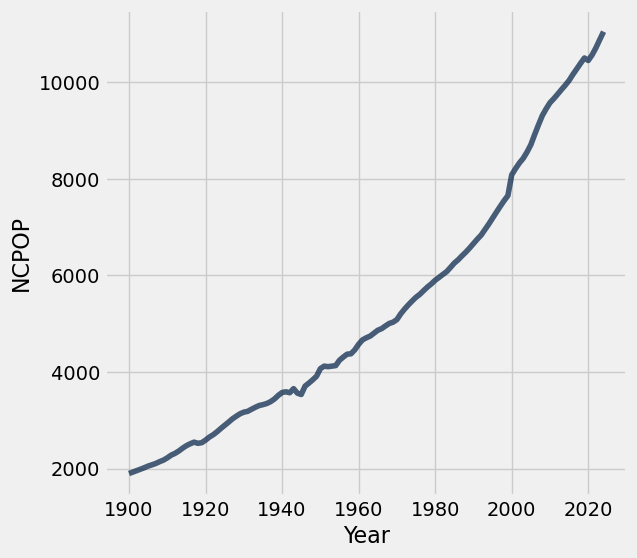

In [3]:
NCpop2024.plot('Year', 'NCPOP')

Run the cell below to load the table `primary_results`. This table has the votes for each candidate or ballot choice in every contest held in North Carolina in the May 8, 2018 elections.

In [4]:
primary_results = Table.read_table('primary_results.csv')
primary_results.show(5)

contest_name,choice,sum_total_votes
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Harold Dean Bowling,1073
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Kristen Powers,4159
ALAMANCE COUNTY BOARD OF COMMISSIONERS (DEM),Robert E. (Bob) Byrd,3842
ALAMANCE COUNTY BOARD OF COMMISSIONERS (REP),Amy Scott Galey,5272
ALAMANCE COUNTY BOARD OF COMMISSIONERS (REP),Robert L. Simpson,3756


**Question 1.2.** Construct a table `OCBOE` containing only the rows for the `contest_name` of `ORANGE COUNTY BOARD OF EDUCATION` and containing only the columns of `choice` and `sum_total_votes`. The table should be sorted in decreasing order by `sum_total_votes`.

In [5]:
OCBOE = primary_results.where(
    'contest_name', 'ORANGE COUNTY BOARD OF EDUCATION').drop(
    'contest_name').sort(
    'sum_total_votes', descending = True
)
OCBOE

choice,sum_total_votes
Brenda Stephens,6114
Sarah Smylie,5439
Hillary MacKenzie,5163
Will Atherton,4810
Jessica Aguilar,1653
Mike O'Hagerty,966
James Needham,935
Hawkeye Aguilar,796
Write-In (Miscellaneous),109
Lisa Knapp (Write-In),13


### `barh`

The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category. `barh` is a table function that will construct a horizontal bar chart for a table when we specify the column label of the categorical variable that we are counting, `cat_variable`, and the column label for the counts of that variable, `counts`.

`table.barh(cat_variable, counts)`

**Question 1.3.** Construct a bar chart for the number of votes for each of the candidates in the `OCBOE` table.

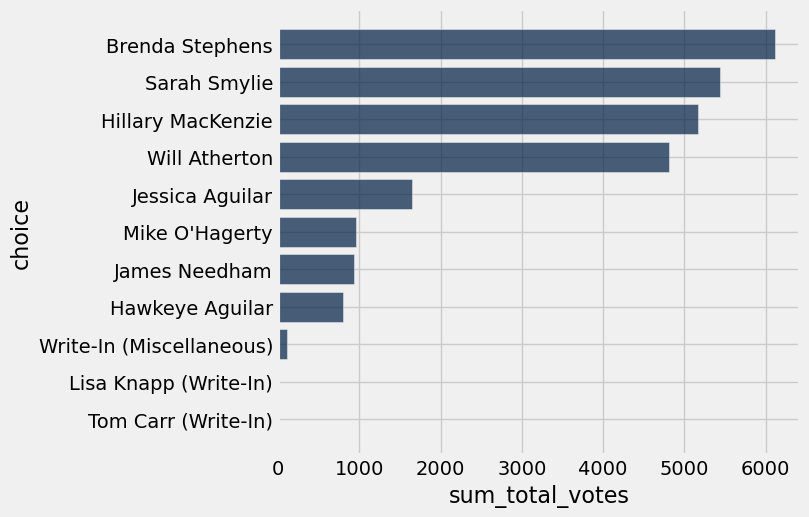

In [23]:
OCBOE.barh('choice', 'sum_total_votes')

Run the cell below to load the `Local_Air_Quality` table. This dataset contains air quality data collected using a PurpleAir Dual Laser Air Quality Sensor located at the Chapel Hill Public Library, as well as data on other variables such as temperature in Fahrenheit.

In [7]:
Local_Air_Quality = Table.read_table("Local_Air_Quality.csv")
Local_Air_Quality.show(5)

X,Y,Last_Check,Current_Particulate_Matter_2_5,PM_2_5_10_Minute_Avg,PM_2_5_30_Minute_Avg,PM_2_5_1_Hour_Avg,PM_2_5_6_Hour_Avg,PM_2_5_24_Hour_Avg,PM_2_5_One_Week_Avg,Temp_F,Humidity,Pressure__mbar,Site_Label,Inside_Outside,Latitude,Longitude,Uptime_Seconds,RSSI_WiFi_signal_strength_dBm,Hardware_Issues,Age_of_Data_at_Check_minutes,ObjectId
-79.0357,35.9325,2018/09/27 19:48:03+00,22.48,22.05,18.33,15.5,10.25,11.44,13.81,88,59,1002.78,Chapel Hill Public Library,outside,35.9325,-79.0357,3060,-84,nan,1,1
-79.0357,35.9325,2018/09/27 19:59:52+00,23,22.47,19.2,16.24,10.46,11.49,13.82,88,58,1003.02,Chapel Hill Public Library,outside,35.9325,-79.0357,3770,-84,nan,0,2
-79.0357,35.9325,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,Chapel Hill Public Library,outside,35.9325,-79.0357,7123,-92,nan,0,3
-79.0357,35.9325,2018/10/02 14:43:38+00,9.32,10.53,13.64,15.65,18.14,14.53,12.89,86,55,1011.93,Chapel Hill Public Library,outside,35.9325,-79.0357,7123,-92,nan,0,4
-79.0357,35.9325,2018/10/02 14:59:23+00,8,9.25,12.58,14.91,17.97,14.51,12.89,86,54,1011.81,Chapel Hill Public Library,outside,35.9325,-79.0357,100,-86,nan,0,5


### `scatter`

A scatter plot displays the relation between two numerical variables. `scatter` is a table function that draws a scatter plot consisting of one point for each row of the table. Its first argument is the label of the column to be plotted on the horizontal axis, `x_label`, and its second argument is the label of the column on the vertical axis, `y_label`.

`table.scatter(x_label, y_label)`

**Question 1.4.** Construct a scatterplot with the variable `Humidity` on the horizontal axis and `Pressure__mbar` on the vertical axis. Note that there are two underscores in the name `Pressure__mbar`

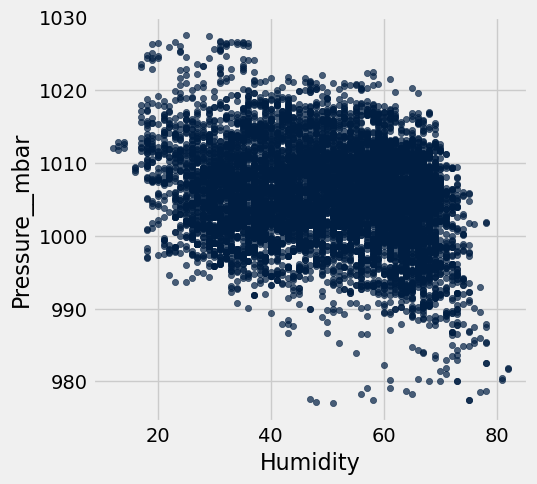

In [8]:
Local_Air_Quality.scatter('Humidity', 'Pressure__mbar')

**Question 1.5.** Comment on the relationship between `Humidity` and `Pressure__mbar` shown in the plot from the previous question.

Most of the points are very densly clustered, showing just a very slight negative correlation between Humidity and Pressure__mbar. 

## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 2.1.** The data are in a CSV file called `unemployment2025.csv`.  Load that file into a table called `unemployment2025`.

In [24]:
unemployment2025 = Table.read_table('unemployment2025.csv')
unemployment2025

DATE,NEI,NEI-PTER
1/1/1994,10.0222,11.0756
2/1/1994,9.84573,11.0018
3/1/1994,9.73953,10.9536
4/1/1994,9.60832,10.7927
5/1/1994,9.39708,10.6147
6/1/1994,9.38761,10.6021
7/1/1994,9.33118,10.4921
8/1/1994,9.28006,10.3986
9/1/1994,9.17516,10.2993
10/1/1994,9.11433,10.2539


**Question 2.2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [10]:
by_nei = unemployment2025.sort('NEI', descending = True)
by_nei_pter = unemployment2025.sort('NEI-PTER', descending = True)

**Question 2.3.** Use `take` to make a table containing the data for the ten months when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment2025` represents a month.

In [11]:
greatest_nei = by_nei.take(np.arange(10))
greatest_nei

DATE,NEI,NEI-PTER
4/1/2020,15.5871,17.7767
5/1/2020,14.307,16.3886
6/1/2020,12.5547,14.2997
7/1/2020,11.9346,13.5166
10/1/2009,10.9685,12.8671
6/1/2009,10.9321,12.8603
5/1/2009,10.8935,12.8244
12/1/2009,10.8862,12.7925
9/1/2009,10.8549,12.7148
11/1/2009,10.8238,12.7253


**Question 2.4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each month.  (The first element of the array should correspond to the first row of `unemployment2025`, and so on.)

*Note:* Use the original `unemployment2025` table for this.

In [12]:
pter = unemployment2025.column('NEI-PTER') - unemployment2025.column('NEI')
pter

array([ 1.05334754,  1.15608763,  1.21406043,  1.18438925,  1.21757544,
        1.21452059,  1.16096738,  1.11848868,  1.12410435,  1.1395789 ,
        1.15124105,  1.11796093,  1.18306656,  1.08119056,  1.10241607,
        1.09044445,  1.13160269,  1.12314504,  1.13550715,  1.14490164,
        1.16468528,  1.12142573,  1.13653312,  1.10929105,  1.03382566,
        1.08395169,  1.09433081,  1.08087047,  1.07816772,  1.07294645,
        1.10665707,  1.09893204,  1.09784893,  1.08306071,  1.00793734,
        1.07987999,  1.05711233,  1.03482368,  1.00939118,  1.04150995,
        0.99607468,  0.98363653,  1.01372555,  0.99755269,  0.99111168,
        0.97765749,  0.97289369,  0.94249193,  0.97375337,  0.94137029,
        0.93688436,  0.87986208,  0.91646706,  0.92251111,  0.94850311,
        0.86772315,  0.84944623,  0.83957242,  0.80562264,  0.82422663,
        0.83911208,  0.8261738 ,  0.85384111,  0.7907943 ,  0.82955357,
        0.81973052,  0.82675801,  0.8015162 ,  0.79882876,  0.76

**Question 2.5.** Add `pter` as a column to `unemployment2025` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [13]:
by_pter = unemployment2025.with_column('PTER', pter).sort(
    'PTER', descending = True)
by_pter

DATE,NEI,NEI-PTER,PTER
4/1/2020,15.5871,17.7767,2.18958
5/1/2020,14.307,16.3886,2.08167
3/1/2009,10.5969,12.5362,1.93929
3/1/2010,10.7805,12.7183,1.93783
7/1/2009,10.7693,12.7011,1.93182
5/1/2009,10.8935,12.8244,1.9309
6/1/2009,10.9321,12.8603,1.92816
4/1/2010,10.6273,12.548,1.92067
8/1/2009,10.7833,12.7034,1.92008
12/1/2009,10.8862,12.7925,1.90623


**Question 2.6.** Create a line plot of the PTER over time. To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment2025` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

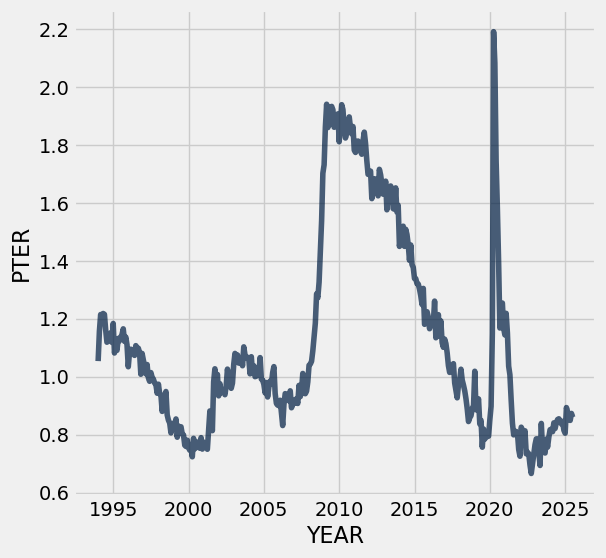

In [14]:
year = 1994 + np.arange(by_pter.num_rows)/12
pter_over_time = unemployment2025.with_columns(
    'PTER', pter,
    'YEAR', year
)
pter_over_time

pter_over_time.plot('YEAR', 'PTER')

**Question 2.7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2009)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

In [15]:
highPTER = True

**Question 2.8.** During what other time period were PTER rates particularly high? Why would this have been the case?

PTER was also particularly high in 2020 during the COVID-19 pandemic, as many businesses shut down due to decreased demand and concerns about employees’ health.

## 3. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2023 and July 1, 2024. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/state/totals/).

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [16]:
# Don't change this cell; just run it.
pop = Table.read_table('NST-EST2024-ALLDATA.csv').where('SUMLEV', 40).select([1, 4, 9, 10, 19, 24, 44, 49])
pop = pop.relabeled('POPESTIMATE2023', '2023').relabeled('POPESTIMATE2024', '2024')
pop = pop.relabeled('BIRTHS2023', 'BIRTHS').relabeled('DEATHS2023', 'DEATHS')
pop = pop.relabeled('NETMIG2023', 'MIGRATION').relabeled('RESIDUAL2023', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2023,2024,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"5,117,673","5,157,699","58,528","60,059","42,941",82
4,Alaska,"736,510","740,133","9,132","5,597","-1,495",28
4,Arizona,"7,473,027","7,582,384","78,647","70,779","87,975",-382
3,Arkansas,"3,069,463","3,088,354","35,298","36,414","22,787",88
4,California,"39,198,693","39,431,263","410,377","303,733","-51,308",943


**Question 3.1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

In [17]:
us_birth_rate = pop.column('BIRTHS')/pop.column('2023')
us_birth_rate

array([ 0.01143645,  0.01239902,  0.01052412,  0.01149973,  0.01046915,
        0.01055845,  0.00963897,  0.01034134,  0.01172809,  0.00978137,
        0.01139932,  0.01058286,  0.0113306 ,  0.01004575,  0.01159774,
        0.01133322,  0.01175606,  0.01153827,  0.01233503,  0.00851572,
        0.01087121,  0.00964315,  0.01001413,  0.01097297,  0.01191368,
        0.01102184,  0.00974452,  0.01238063,  0.01020327,  0.00862431,
        0.01092355,  0.01016942,  0.01043138,  0.0111406 ,  0.01231993,
        0.01089256,  0.01198189,  0.0091298 ,  0.00992762,  0.00911975,
        0.01079321,  0.0121648 ,  0.01162625,  0.01272349,  0.01319927,
        0.00786178,  0.01081069,  0.01045713,  0.00954253,  0.01014231,
        0.01035266,  0.00589427])

**Question 3.2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1.0%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [18]:
migration_rates = pop.with_columns('MIGRATION RATE', np.abs(pop.column('MIGRATION')/pop.column('2023')))
movers = migration_rates.where('MIGRATION RATE', are.above(0.01)).column('MIGRATION RATE')
movers

array([ 0.01177234,  0.01535666,  0.01126106,  0.02302035,  0.01072942,
        0.01094556,  0.01441203,  0.01843358,  0.01161073,  0.01476222])

**Question 3.3.** Assign `south_births` to the total number of births that occurred in region 3 (the Southern US). 

In [19]:
south_births = sum(pop.where('REGION', 3).column('BIRTHS'))
south_births

1487989

**Question 3.4.** Assign `more_than_NC_births` to the number of states that had a total number of births that was larger than the *total number of births in North Carolina* during this time interval.

In [31]:
more_than_NC_births = pop.where('BIRTHS', are.above(pop.where('NAME', 'North Carolina').column(
            'BIRTHS').item(0))).num_rows
more_than_NC_births

8

**Question 3.5.** In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

In [32]:
visualization = scatter plot

SyntaxError: invalid syntax (1157143084.py, line 1)

**Question 3.6.** In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

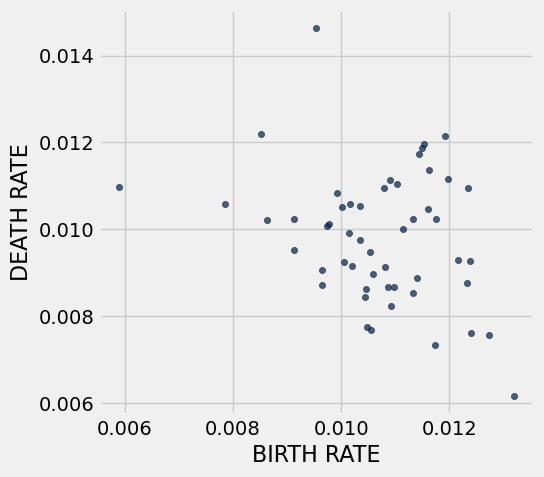

In [22]:
# Generate your chart in this cell
us_death_rate = pop.column('DEATHS')/pop.column('2023')
BIRTH_DEATH_RATES = pop.with_columns(
    'BIRTH RATE', us_birth_rate,
    'DEATH RATE', us_death_rate)
BIRTH_DEATH_RATES.scatter('BIRTH RATE', 'DEATH RATE')

**Question 3.7.** Is there an association between birth rate and death rate during this time interval? Describe the relationship shown in the chart. 

There is a negative association between birth rate and death rate during this time interval. In general, as birth rate increases, death rate decreases.